In [122]:
import pandas as pd

In [123]:
# cargando datos de la web
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")

In [124]:
print(df)

    A   B   C   D
0  25  45  30  54
1  30  55  29  60
2  28  29  33  51
3  36  56  37  62
4  29  40  27  73


# respuesta:diámetro medio ponderado y factor: calibre

# reshape los datos para usar statsmodels

In [125]:
dfb = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

# reemplazo de nombres de columnas

In [126]:
dfb.columns = ['indice', 'calibres', 'diametro']

# descripción de datos

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

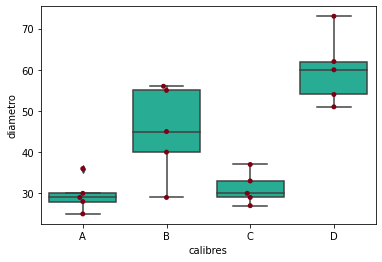

In [128]:
ax = sns.boxplot(x='calibres', y='diametro', data=dfb, color='#12c2a2')
ax = sns.swarmplot(x="calibres", y="diametro", data=dfb, color='#7d0014')
plt.show()

# análisis inferencial
https://github.com/darghan/R_models_and_statistics/blob/main/datadisennio

In [129]:
#dfb = pd.read_csv('https://github.com/darghan/unal/blob/main/dej1.txt',sep="\t")

#dfb.head()

In [130]:
import scipy.stats as stats
# estadísticas ANOVA de 1 vía- F y p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


In [131]:
# tabla anova tal como R
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [132]:
# MCO
modelo = ols('diametro ~ C(calibres)', data=dfb).fit()
tabla_aov = sm.stats.anova_lm(modelo, typ=2)
tabla_aov

,sum_sq,df,F,PR(>F)
C(calibres),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [133]:
#! pip install bioinfokit
# ANOVA usando bioinfokit v1.0.3 o superior
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=dfb, res_var='diametro', anova_model='diametro ~ C(calibres)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(calibres),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


# comparando medias

In [134]:
from bioinfokit.analys import stat

In [135]:
res = stat()
res.tukey_hsd(df=dfb, res_var='diametro',xfac_var='calibres', anova_model='diametro ~ C(calibres)')
res.tukey_summary

C:\Users\57316\anaconda3\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,15.4,1.692871,29.107129,4.546156,0.025070
1,A,C,1.6,-12.107129,15.307129,0.472328,0.900000
2,A,D,30.4,16.692871,44.107129,8.974231,0.001000
3,B,C,13.8,0.092871,27.507129,4.073828,0.048178
4,B,D,15.0,1.292871,28.707129,4.428074,0.029578
5,C,D,28.8,15.092871,42.507129,8.501903,0.001000


In [136]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=dfb['diametro'], groups=dfb['calibres'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     15.4 0.0251   1.6929 29.1071   True
     A      C      1.6    0.9 -12.1071 15.3071  False
     A      D     30.4  0.001  16.6929 44.1071   True
     B      C    -13.8 0.0482 -27.5071 -0.0929   True
     B      D     15.0 0.0296   1.2929 28.7071   True
     C      D     28.8  0.001  15.0929 42.5071   True
-----------------------------------------------------


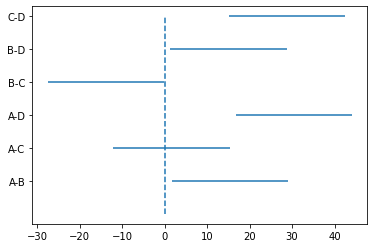

In [137]:
import matplotlib.pyplot as plt
rows = tukey.summary().data[1:] #listando
plt.hlines( range(len(rows)), [row[4] for row in rows], [row[5] for row in rows] )
plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
plt.gca().set_yticks( range( len( rows ) ) )
plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
plt.show()

# otra forma: cargando datos en el script

In [140]:
import numpy as np
dfc = pd.DataFrame({'respuesta': [85, 86, 88, 75, 78, 94, 98, 79, 71, 80,
                             91, 92, 93, 90, 97, 94, 82, 88, 95, 96,
                             79, 78, 88, 94, 92, 85, 83, 85, 82, 81],
                   'tratamiento': np.repeat(['a', 'b', 'c'], repeats=10)}) 
tukey = pairwise_tukeyhsd(endog=dfc['respuesta'],groups=dfc['tratamiento'],alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     a      b      8.4 0.0158   1.4272 15.3728   True
     a      c      1.3 0.8864  -5.6728  8.2728  False
     b      c     -7.1 0.0453 -14.0728 -0.1272   True
-----------------------------------------------------


# QQ-plot

C:\Users\57316\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


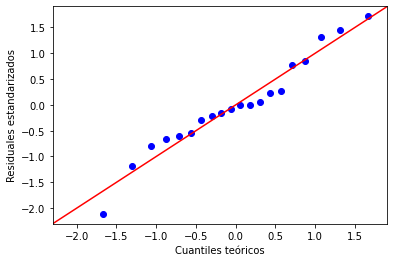

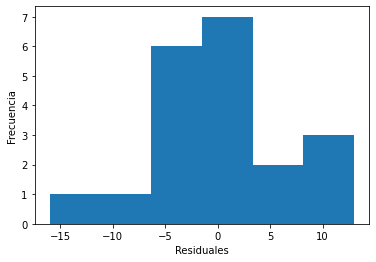

In [148]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# qqplot
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Residuales estandarizados")
plt.show()

# histograma
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar') 
plt.xlabel("Residuales")
plt.ylabel('Frecuencia')
plt.show()

# prueba de normalidad


In [152]:
import scipy.stats as stats
w, pvalue = stats.shapiro(modelo.resid)
print(w, pvalue)

0.9685019850730896 0.7229772806167603


# prueba de homocedasticidad

In [154]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'])
print(w, pvalue)

5.687843565012841 0.1278253399753447


# para formato largo

In [155]:
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=dfb, res_var='diametro', xfac_var='calibres')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),5.6878
1,Degrees of freedom (Df),3.0000
2,p value,0.1278


# prueba alternativa: Levene


In [156]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=dfb, res_var='diametro', xfac_var='calibres')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.9220
1,Degrees of freedom (Df),3.0000
2,p value,0.1667
